     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


<ipython-input-5-c57a2c940a13>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green','yellow','red'])


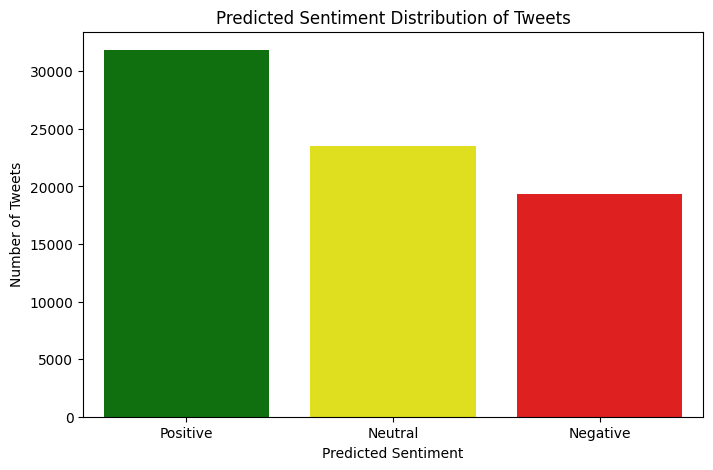

predicted_sentiment
Positive    31842
Neutral     23505
Negative    19335
Name: count, dtype: int64


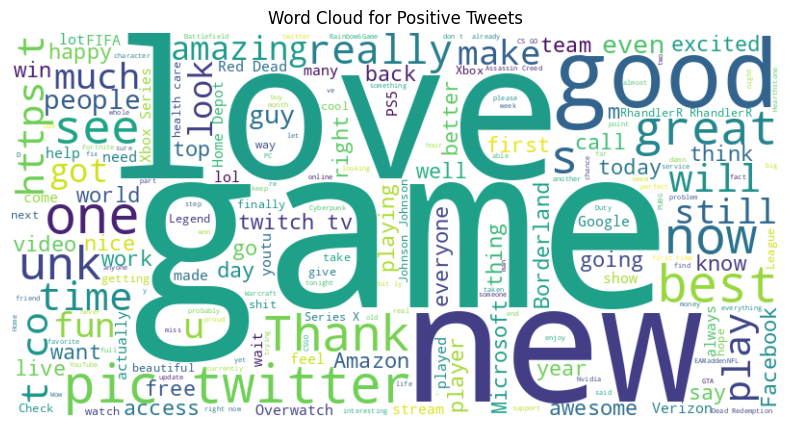

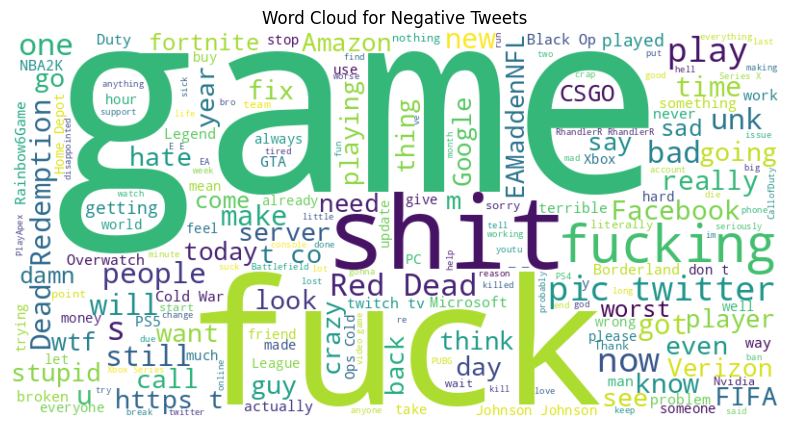

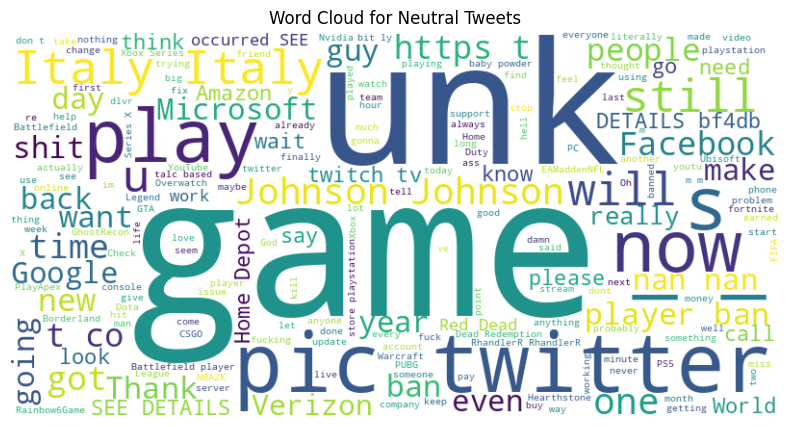

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import re

df=pd.read_csv("/content/twitter_training.csv (1).zip", header=None, names=["id","entity","sentiment","text"])
print(df.head())
#apply sentiment polarity using textblob
df['sentiment_score']= df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

#create custom sentiment category based on polarity score
df['predicted_sentiment']=df['sentiment_score'].apply( lambda x: 'Positive' if x>0.05 else ('Negative'if x<-0.05 else 'Neutral'))

#count the predicted sentiment
sentiment_counts= df['predicted_sentiment'].value_counts()

#visualize sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green','yellow','red'])
plt.xlabel("Predicted Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Predicted Sentiment Distribution of Tweets")
plt.show()

print(sentiment_counts)

#generate word cloud for each sentiment
def generate_wordcloud(sentiment):
  text=" ".join(df[df['predicted_sentiment']== sentiment]['text'].astype(str))
  wordcloud= WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f"Word Cloud for {sentiment} Tweets")
  plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')
sentiment_counts=df['sentiment'].value_counts()



